In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
Data = pd.read_excel(r"C:\Users\Padma Jothi\Desktop\Capstone\Industrial Copper Modeling\Copper_Set.xlsx")

In [3]:
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
Data.shape

(181673, 14)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
Data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
Data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

## CONVERTING OBJECT TO DATETIME FORMAT

In [8]:
Data['item_date'] = pd.to_datetime(Data['item_date'], format='%Y%m%d',errors='coerce')
Data['delivery date'] = pd.to_datetime(Data['delivery date'], format='%Y%m%d',errors='coerce')

In [9]:
Data['item_date']

0        2021-04-01
1        2021-04-01
2        2021-04-01
3        2021-04-01
4        2021-04-01
            ...    
181668   2020-07-02
181669   2020-07-02
181670   2020-07-02
181671   2020-07-02
181672   2020-07-02
Name: item_date, Length: 181673, dtype: datetime64[ns]

In [10]:
Data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [11]:
print(Data["item_date"].min())
print(Data["item_date"].max())

2020-07-02 00:00:00
2021-04-01 00:00:00


In [12]:
print(Data["delivery date"].min())
print(Data["delivery date"].max())

2019-04-01 00:00:00
2022-01-01 00:00:00


## Convert Column to Integer

In [13]:
convert_column_names = ["quantity tons","customer","country","application","thickness","width","selling_price"]
for i in convert_column_names:
    Data[i] = pd.to_numeric(Data[i],errors="coerce")
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [14]:
Data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

## Filtering the Material_ref column

In [15]:
Data["material_ref"] = Data["material_ref"].apply(lambda x:np.nan if str(x).startswith('0000')else x)
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [16]:
Data.isna().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

## Drop Material_ref Column

In [17]:
Data.drop(columns=['material_ref'],inplace=True)
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00



## Drop ID Column

In [18]:
Data.drop(columns=['id'],inplace=True)
Data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [19]:
Data.isna().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

## FILLNA VALUES 

## Filling Null values in Numerical Column with median values

In [20]:
Data['quantity tons'].fillna(Data['quantity tons'].median(),inplace=True)
Data['customer'].fillna(Data['customer'].median(),inplace=True)
Data['country'].fillna(Data['country'].median(),inplace=True)
Data['application'].fillna(Data['application'].median(),inplace=True)
Data['thickness'].fillna(Data['thickness'].median(),inplace=True)
Data['selling_price'].fillna(Data['selling_price'].median(),inplace=True)

In [21]:
Data.isna().sum()

item_date        3
quantity tons    0
customer         0
country          0
status           2
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    3
selling_price    0
dtype: int64

## Filling Null values in Categorical columns with mode

In [22]:
Data['item_date'].fillna(Data['item_date'].mode().iloc[0],inplace=True)
Data['status'].fillna(Data['status'].mode().iloc[0],inplace=True)
Data['delivery date'].fillna(Data['delivery date'].mode().iloc[0],inplace=True)

In [23]:
Data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Converting to csv file

In [24]:
Data.to_csv('Copper_cleaning.csv',index=False)

# EDA

In [25]:
eda_data = Data.copy(True)

In [26]:
eda_data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

## Outliers and Skewness

#### Using Boxplot and Distplot

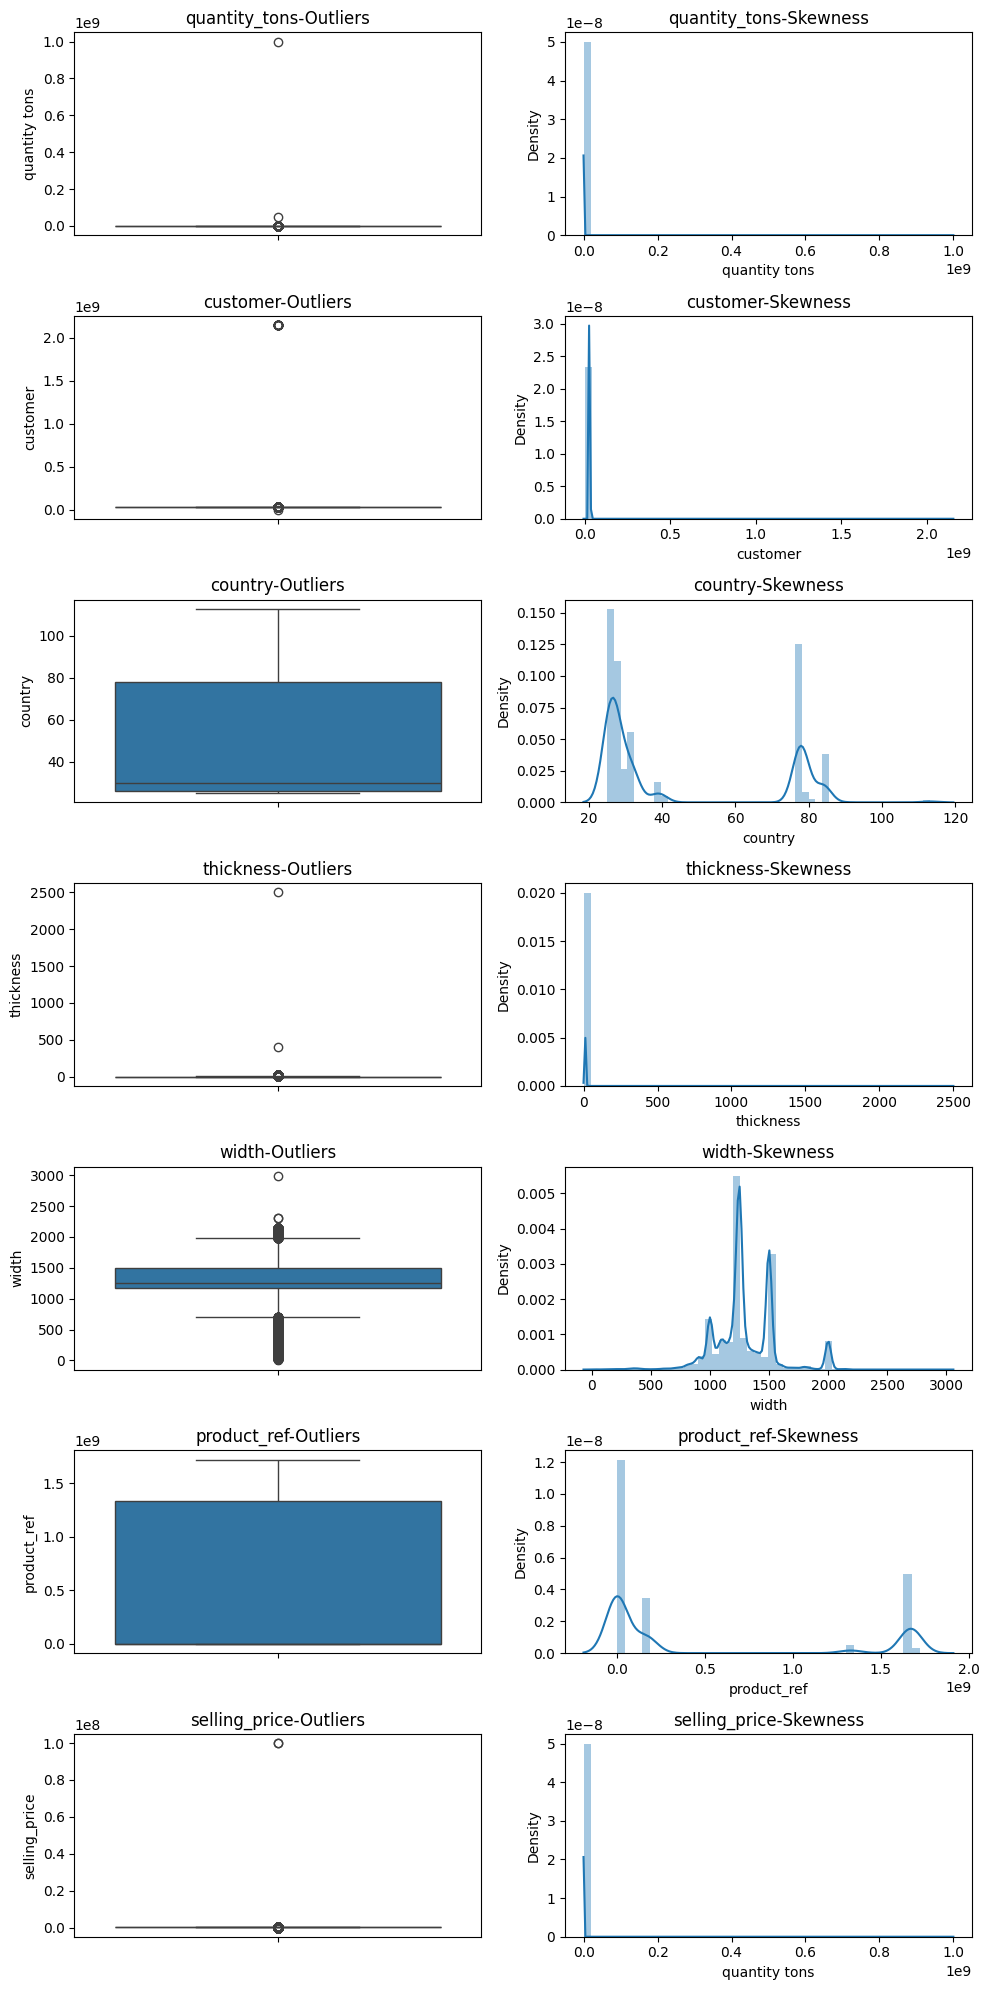

In [27]:
#Creating a figure with subplots
fig,axes = plt.subplots(7,2,figsize=(10,20))

sns.boxplot(ax=axes[0,0],data=eda_data['quantity tons'])    #quantity tons
axes[0,0].set_title('quantity_tons-Outliers')
sns.distplot(ax=axes[0,1],a=eda_data['quantity tons'])
axes[0,1].set_title('quantity_tons-Skewness')

sns.boxplot(ax=axes[1,0],data=eda_data['customer'])         #customer
axes[1,0].set_title('customer-Outliers')
sns.distplot(ax=axes[1,1],a=eda_data['customer'])
axes[1,1].set_title('customer-Skewness')

sns.boxplot(ax=axes[2,0],data=eda_data['country'])          #country
axes[2,0].set_title('country-Outliers')
sns.distplot(ax=axes[2,1],a=eda_data['country'])
axes[2,1].set_title('country-Skewness')

sns.boxplot(ax=axes[3,0],data=eda_data['thickness'])        #thickness
axes[3,0].set_title('thickness-Outliers')
sns.distplot(ax=axes[3,1],a=eda_data['thickness'])
axes[3,1].set_title('thickness-Skewness')

sns.boxplot(ax=axes[4,0],data=eda_data['width'])            #width
axes[4,0].set_title('width-Outliers')
sns.distplot(ax=axes[4,1],a=eda_data['width'])
axes[4,1].set_title('width-Skewness')

sns.boxplot(ax=axes[5,0],data=eda_data['product_ref'])      #product_ref
axes[5,0].set_title('product_ref-Outliers')
sns.distplot(ax=axes[5,1],a=eda_data['product_ref'])
axes[5,1].set_title('product_ref-Skewness')

sns.boxplot(ax=axes[6,0],data=eda_data['selling_price'])    #selling_price
axes[6,0].set_title('selling_price-Outliers')
sns.distplot(ax=axes[6,1],a=eda_data['quantity tons'])
axes[6,1].set_title('selling_price-Skewness')

plt.tight_layout()
plt.show()

In [28]:
eda_data.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181673,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673,1.816730e+05
mean,2020-11-26 22:57:05.323521024,5.874894e+03,3.051221e+07,44.890727,25.614406,2.564822,1295.286724,4.739679e+08,2021-01-25 22:43:50.629757696,1.918029e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.097037e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716038e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349075e+06,2.433375e+07,24.403034,17.753421,6.572303,261.631754,7.175101e+08,NaN,3.317947e+05


## Skewness

In [29]:
out_skew_data = eda_data.copy(True)

In [30]:
out_skew_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


## Data Transformation

In [31]:
skewed_columns = ['quantity tons', 'thickness', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
selling_price : 7 


In [32]:
out_skew_data.isna().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [33]:
out_skew_data.dropna(inplace=True)

In [34]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

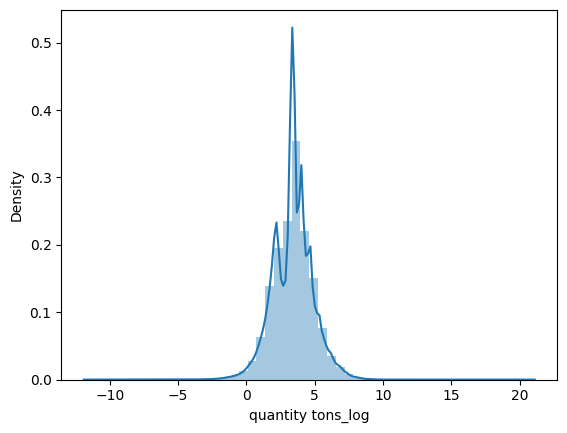

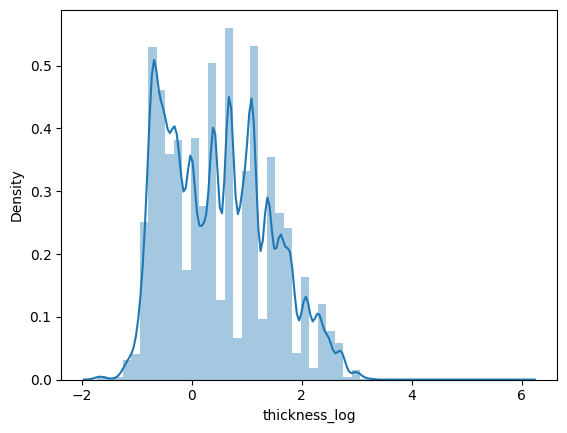

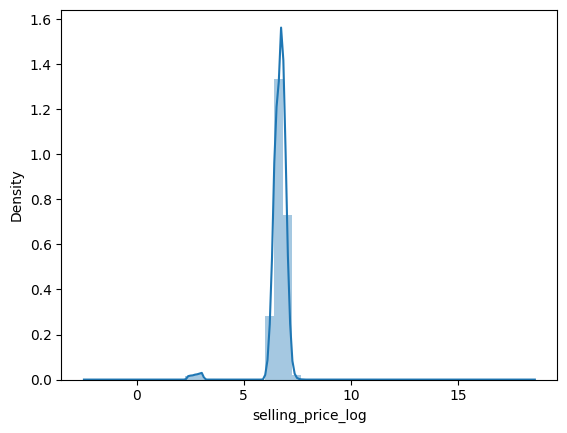

In [35]:
out_skew_data['quantity tons_log'] = np.log(out_skew_data['quantity tons'])
sns.distplot(out_skew_data['quantity tons_log'])
plt.show()

out_skew_data['thickness_log'] = np.log(out_skew_data['thickness'])
sns.distplot(out_skew_data['thickness_log'])
plt.show()

out_skew_data['selling_price_log'] = np.log(out_skew_data['selling_price'])
sns.distplot(out_skew_data['selling_price_log'])
plt.show()

In [36]:
out_skew_data_1=out_skew_data.copy(True)
out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)

In [37]:
out_skew_data_1.skew()

quantity tons        424.677959
customer              86.982674
country                0.753768
application            0.724624
thickness             15.291361
width                  0.374564
product_ref            1.015276
selling_price        301.378964
quantity tons_log     -0.068765
thickness_log          0.349026
selling_price_log     -5.335398
dtype: float64

## Outliers

In [38]:
outliers_columns = ['quantity tons','thickness','width','selling_price']
before_stats = out_skew_data[outliers_columns].describe()


#Iterate over outlier columns and remove outliers
for column in outliers_columns:
    Q1 = out_skew_data[column].quantile(0.25)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    print(f"{column}: lower_bound={lower_bound}, upper_bound={upper_bound}")  # Debugging line
    out_skew_data[column] = out_skew_data[column].clip(lower=lower_bound, upper=upper_bound)

after_stats = out_skew_data[outliers_columns].describe()

print("Statistics before removing outliers:")
print(before_stats)
print("Statistics after removing outliers:")
print(after_stats)

quantity tons: lower_bound=-73.31440337758708, upper_bound=151.44635025057818
thickness: lower_bound=-2.75, upper_bound=6.449999999999999
width: lower_bound=700.0, upper_bound=1980.0
selling_price: lower_bound=243.0, upper_bound=1379.0
Statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875259e+03       2.551128    1295.289042   1.918150e+03
std     2.349146e+06       2.977117     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036500e+01       1.500000    1250.000000   8.120000e+02
75%     6.716107e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08
Statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  181662.000000  181662.00

# Model Fitting and Encoding

In [39]:
out_skew_data['delivery_time_taken']=(out_skew_data['item_date']-out_skew_data['delivery date']).abs().dt.days
out_skew_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91
1,2021-04-01,151.446350,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0
2,2021-04-01,151.446350,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90
3,2021-04-01,151.446350,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90
4,2021-04-01,151.446350,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31


In [40]:
out_skew_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181662 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            181662 non-null  datetime64[ns]
 1   quantity tons        181662 non-null  float64       
 2   customer             181662 non-null  float64       
 3   country              181662 non-null  float64       
 4   status               181662 non-null  object        
 5   item type            181662 non-null  object        
 6   application          181662 non-null  float64       
 7   thickness            181662 non-null  float64       
 8   width                181662 non-null  float64       
 9   product_ref          181662 non-null  int64         
 10  delivery date        181662 non-null  datetime64[ns]
 11  selling_price        181662 non-null  float64       
 12  quantity tons_log    181662 non-null  float64       
 13  thickness_log      

In [41]:
out_skew_data.select_dtypes(include=np.number)

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00,3.991779,0.693147,6.749931,91
1,151.446350,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00,6.643822,-0.223144,6.953684,0
2,151.446350,30153963.0,30.0,28.0,0.38,952.0,628377,644.33,5.956169,-0.967584,6.468211,90
3,151.446350,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00,5.310301,0.832909,6.643790,90
4,151.446350,30211560.0,28.0,10.0,4.00,1980.0,640665,577.00,6.666354,1.386294,6.357842,31
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,30200854.0,25.0,41.0,0.96,1240.0,164141591,602.00,4.670802,-0.040822,6.400257,1
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00,4.629691,-0.040822,6.381816,1
181669,151.446350,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00,5.337954,-0.051293,6.378426,1
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00,1.443523,-0.342490,6.428105,1


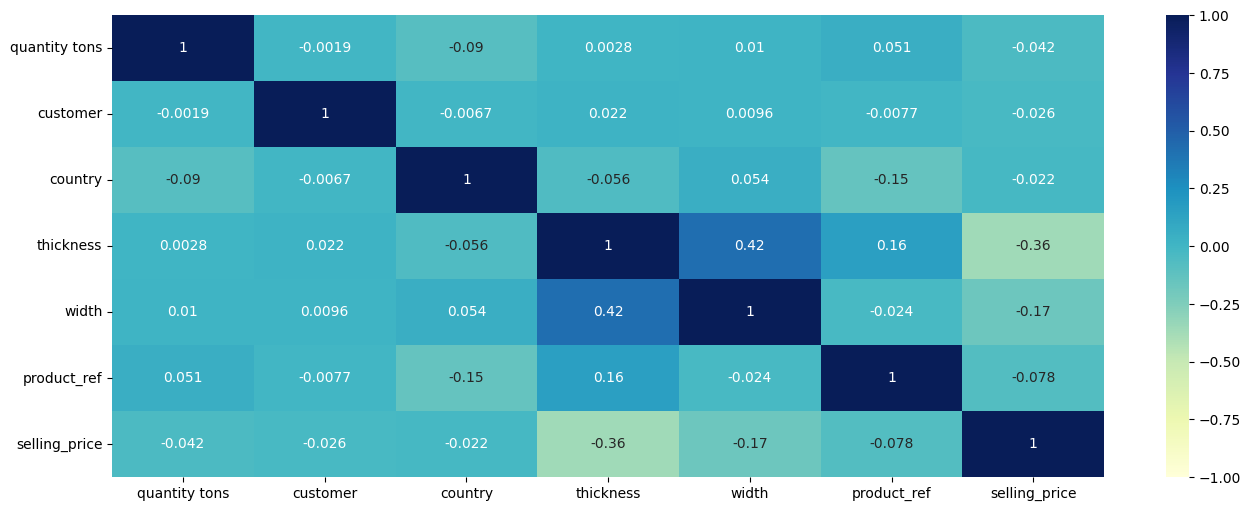

In [42]:
x = out_skew_data[['quantity tons','customer','country','thickness','width','product_ref','selling_price']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(x,annot= True,vmin = -1,cmap="YlGnBu")
plt.show()

## Finding Unique Values

In [43]:
out_skew_data['country'] = out_skew_data['country'].astype(str)
country=out_skew_data['country'].unique()
status=out_skew_data['status'].unique()
item=out_skew_data['item type'].unique()
print(country)
print(status)
print(item)

['28.0' '25.0' '30.0' '32.0' '38.0' '78.0' '27.0' '77.0' '113.0' '79.0'
 '26.0' '39.0' '40.0' '84.0' '80.0' '107.0' '89.0']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


## Encode the Categorical Column

## Country

In [44]:
#from sklearn.preprocessing import OrdinalEncoder

#encode=OrdinalEncoder()
#out_skew_data["country"] = encode.fit_transform(out_skew_data[["country"]])
#transformed_country=out_skew_data["country"].unique()

#transformed_country

## Status

In [45]:
encode=OrdinalEncoder()
out_skew_data['status'] = encode.fit_transform(out_skew_data[['status']])
transformed_status=out_skew_data['status'].unique()

transformed_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

## Item Type

In [46]:
encode=OrdinalEncoder()
out_skew_data["item type"] = encode.fit_transform(out_skew_data[["item type"]])
transformed_item=out_skew_data["item type"].unique()

transformed_item

array([5., 6., 3., 1., 2., 0., 4.])

In [47]:
co=out_skew_data.corr()
co

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
item_date,1.000000,-0.004132,-0.003787,-0.007749,0.080490,0.077165,-0.008461,0.004422,0.005961,0.045224,0.920100,0.556554,-0.017656,0.004270,0.229234,0.438586
quantity tons,-0.004132,1.000000,-0.001917,-0.090052,-0.055881,-0.245006,0.095509,0.002781,0.010415,0.051466,0.016103,-0.041803,0.881417,0.018187,0.010080,0.067691
customer,-0.003787,-0.001917,1.000000,-0.006669,-0.020450,-0.010901,-0.006869,0.021806,0.009585,-0.007716,-0.002908,-0.026032,0.002611,0.018859,-0.061358,-0.001515
country,-0.007749,-0.090052,-0.006669,1.000000,0.090588,0.130032,-0.019298,-0.055994,0.053864,-0.147310,-0.092241,-0.021736,-0.088923,-0.065324,-0.028617,-0.240433
status,0.080490,-0.055881,-0.020450,0.090588,1.000000,0.242816,0.132770,-0.127192,-0.092672,-0.069760,-0.054796,0.122194,-0.101486,-0.122197,0.242182,-0.260778
item type,0.077165,-0.245006,-0.010901,0.130032,0.242816,1.000000,0.169087,-0.076804,-0.092086,-0.089531,0.005812,0.096072,-0.321420,-0.101426,0.042396,-0.142563
application,-0.008461,0.095509,-0.006869,-0.019298,0.132770,0.169087,1.000000,-0.163479,-0.198875,-0.131813,-0.078519,0.129901,0.063950,-0.197620,0.023008,-0.167831
thickness,0.004422,0.002781,0.021806,-0.055994,-0.127192,-0.076804,-0.163479,1.000000,0.419075,0.155755,0.042483,-0.363865,0.027547,0.953133,-0.134436,0.084548
width,0.005961,0.010415,0.009585,0.053864,-0.092672,-0.092086,-0.198875,0.419075,1.000000,-0.024106,0.026825,-0.173317,0.032065,0.401386,-0.071270,0.038787
product_ref,0.045224,0.051466,-0.007716,-0.147310,-0.069760,-0.089531,-0.131813,0.155755,-0.024106,1.000000,0.096174,-0.077802,0.064063,0.234166,0.001632,0.161775


## After Encoding the Categorical column

In [48]:
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0


In [49]:
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)

After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0


In [50]:
#for i,j in zip(country, transformed_country):
    #print('After encoding :',i,'----- encoded :',j)

## Loading and Storing with Pickle

In [51]:
import pickle

#file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

#with open(file_path, 'wb') as file:
    #pickle.dump(transformed_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path2},{file_path3}')

Pickle file created: status.pkl,item type.pkl


In [52]:
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [53]:
category_col=['status', 'item type']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    out_skew_data[i] = encoder.fit_transform(out_skew_data[[i]])
    print(out_skew_data[i].unique())

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type
[5. 6. 3. 1. 2. 0. 4.]


In [54]:
out_skew_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91
1,2021-04-01,151.446350,30202938.0,25.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0
2,2021-04-01,151.446350,30153963.0,30.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90
3,2021-04-01,151.446350,30349574.0,32.0,7.0,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90
4,2021-04-01,151.446350,30211560.0,28.0,7.0,5.0,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31


## Scaling

In [55]:
X = out_skew_data[['quantity tons_log','thickness_log','width','country','status','item type', 'application','product_ref','delivery_time_taken']]
y = out_skew_data[['selling_price_log']].values

#Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [56]:
import pickle
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [57]:
with open('scaling.pkl', 'rb') as file:
    scaler = pickle.load(file)

## Regression Model for predicting the selling price

In [58]:
LR_Model = LinearRegression()
LR_Model.fit(X_train,y_train)

#Make predictions on the tests
LR_Preds = LR_Model.predict(X_test)

#Evaluate the models
LR_MSE = mean_squared_error(y_test,LR_Preds)
LR_R2 = r2_score(y_test,LR_Preds)

print("mean_squared_errors:",LR_MSE)
print("R-squared:",LR_R2)

mean_squared_errors: 0.28965034191103495
R-squared: 0.11300025828869209


In [59]:
import pickle
file_path12='LinearRegression.pkl'
with open(file_path12, 'wb') as file:
    pickle.dump(LR_Model, file)
print(f'Pickle file created: {file_path12}')

Pickle file created: LinearRegression.pkl


In [60]:
with open('LinearRegression.pkl', 'rb') as file:
    LR_Model = pickle.load(file)

LR_Model

LinearRegression()

## Classification Model for predicting the Status Won or Lost

In [61]:
X = out_skew_data[['quantity tons','thickness','width','country','selling_price','item type', 'application','product_ref','delivery_time_taken']].values
y = out_skew_data[['status']].values

#Standard Scaler
scaler_classify = StandardScaler()
X_scale_classify = scaler.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale_classify,y,test_size=0.2,random_state=20)

In [62]:
file_path8='scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')

Pickle file created: scaling_classify.pkl


In [63]:
DTC_Model = DecisionTreeClassifier()

#Train the Models
DTC_Model.fit(X_train,y_train)

#Make predictions on the tests
DTC_Preds = DTC_Model.predict(X_test)

#Evaluate the models
DTC_CM = confusion_matrix(y_test,DTC_Preds)
DTC_AS = accuracy_score(y_test,DTC_Preds)

print("confusion_matrix:",DTC_CM)
print("acuuracy_score :",DTC_AS)

confusion_matrix: [[  617     0     0     0     0     0     0     0]
 [    0  5800   300     0     4    79    34   756]
 [    1   248  3114     0     0    53    18   461]
 [    0     0     0     1     0     0     0     0]
 [    0     4     0     0     4     0     0     0]
 [    0    90    46     0     0   471     3   191]
 [    1    29    25     0     0     7   756    73]
 [    0   855   521     0     2   212    75 21482]]
acuuracy_score : 0.8874852062862962


In [64]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')
country=input('Enter country:')

new_sample_st = input("Enter a status: ")
s = None
for i, j in zip(status, transformed_status):
    if new_sample_st == i:
        s = j
        break
else:
    print("Status not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

try:
  x = [quantity,thickness,width,country, s, it, 41.0,611993, 28]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler.transform(x)
  new_pred = LR_Model.predict(new_sample_scaled)
  print('Predicted selling price:',new_pred )
except:
  print('enter correct values')

Status not found.
Item type not found.
enter correct values


In [ ]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')
selling_price=input('Enter selling price :')
country=input('Enter the country:')

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()
try:
  x = [quantity,thickness,width,selling_price,c,it, 10.0,1670798778, 91]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler_classify.transform(x)
  new_pred = DTC_Model.predict(new_sample_scaled)

  if new_pred==6:
      print('WON' )
  else:
      print('LOST')
except:
  print("enter valid values")

: 